In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Similarity matrix folders 100-20230415T025209Z-001/Similarity matrix folders 100/fifth1000.csv',header=None)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.0,7.000000,8.000000,...,990.000000,991.0,992.000000,993.000000,994.000000,995.000000,996.000000,997.000000,998.000000,999.000000
1,0.0,1.000000,0.000000,0.037037,0.029586,0.022857,0.047059,0.0,0.070513,0.043860,...,0.056075,0.0,0.037383,0.025210,0.043478,0.031128,0.035019,0.023747,0.017341,0.048077
2,1.0,0.000000,1.000000,0.000000,0.007463,0.000000,0.000000,0.0,0.000000,0.012658,...,0.013699,0.0,0.000000,0.003067,0.000000,0.004444,0.000000,0.000000,0.002049,0.000000
3,2.0,0.037037,0.000000,1.000000,0.131707,0.058036,0.020833,0.0,0.076555,0.180000,...,0.075472,0.0,0.069620,0.049505,0.040000,0.045307,0.065789,0.039627,0.042705,0.050314
4,3.0,0.029586,0.007463,0.131707,1.000000,0.046332,0.058480,0.0,0.048583,0.562963,...,0.073298,0.0,0.051813,0.055300,0.031447,0.050000,0.049853,0.032258,0.045531,0.041451
5,4.0,0.022857,0.000000,0.058036,0.046332,1.000000,0.039106,0.0,0.060241,0.058824,...,0.071429,0.0,0.061224,0.047511,0.030488,0.074184,0.064516,0.058952,0.045151,0.040404
6,5.0,0.047059,0.000000,0.020833,0.058480,0.039106,1.000000,0.0,0.035714,0.067797,...,0.034483,0.0,0.026087,0.027548,0.012821,0.034221,0.041985,0.023316,0.022945,0.017544
7,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.0,0.070513,0.000000,0.076555,0.048583,0.060241,0.035714,0.0,1.000000,0.062500,...,0.070270,0.0,0.042553,0.053738,0.032895,0.063830,0.066869,0.053452,0.047863,0.037433
9,8.0,0.043860,0.012658,0.180000,0.562963,0.058824,0.067797,0.0,0.062500,1.000000,...,0.094891,0.0,0.064748,0.057743,0.048077,0.055944,0.052083,0.031553,0.046296,0.050360


In [ ]:
!pip install networkx
!pip install python-louvain
!pip install scikit-learn
!pip install infomap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = 

In [ ]:
import networkx as nx
import community as louvain
from sklearn import cluster
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
df2=df.fillna(0)

In [ ]:
import numpy as np
dataFrame = df2.drop(0)
#dataFrame = dataFrame.drop(1)
dataFrame.head(10)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
1,0.0,1.000000,0.000000,0.037037,0.029586,0.022857,0.047059,0.0,0.070513,0.043860,...,0.056075,0.0,0.037383,0.025210,0.043478,0.031128,0.035019,0.023747,0.017341,0.048077
2,1.0,0.000000,1.000000,0.000000,0.007463,0.000000,0.000000,0.0,0.000000,0.012658,...,0.013699,0.0,0.000000,0.003067,0.000000,0.004444,0.000000,0.000000,0.002049,0.000000
3,2.0,0.037037,0.000000,1.000000,0.131707,0.058036,0.020833,0.0,0.076555,0.180000,...,0.075472,0.0,0.069620,0.049505,0.040000,0.045307,0.065789,0.039627,0.042705,0.050314
4,3.0,0.029586,0.007463,0.131707,1.000000,0.046332,0.058480,0.0,0.048583,0.562963,...,0.073298,0.0,0.051813,0.055300,0.031447,0.050000,0.049853,0.032258,0.045531,0.041451
5,4.0,0.022857,0.000000,0.058036,0.046332,1.000000,0.039106,0.0,0.060241,0.058824,...,0.071429,0.0,0.061224,0.047511,0.030488,0.074184,0.064516,0.058952,0.045151,0.040404
6,5.0,0.047059,0.000000,0.020833,0.058480,0.039106,1.000000,0.0,0.035714,0.067797,...,0.034483,0.0,0.026087,0.027548,0.012821,0.034221,0.041985,0.023316,0.022945,0.017544
7,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,7.0,0.070513,0.000000,0.076555,0.048583,0.060241,0.035714,0.0,1.000000,0.062500,...,0.070270,0.0,0.042553,0.053738,0.032895,0.063830,0.066869,0.053452,0.047863,0.037433
9,8.0,0.043860,0.012658,0.180000,0.562963,0.058824,0.067797,0.0,0.062500,1.000000,...,0.094891,0.0,0.064748,0.057743,0.048077,0.055944,0.052083,0.031553,0.046296,0.050360
10,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:

dataFrame = dataFrame.drop([0], axis=1)

dataFrame.index = np.arange(1, len(dataFrame) + 1)
dataFrame.columns = range(1,dataFrame.columns.size+1)

In [ ]:
df3=dataFrame
print(df3.head(10))

        1         2         3         4         5         6     7     \
1   1.000000  0.000000  0.037037  0.029586  0.022857  0.047059   0.0   
2   0.000000  1.000000  0.000000  0.007463  0.000000  0.000000   0.0   
3   0.037037  0.000000  1.000000  0.131707  0.058036  0.020833   0.0   
4   0.029586  0.007463  0.131707  1.000000  0.046332  0.058480   0.0   
5   0.022857  0.000000  0.058036  0.046332  1.000000  0.039106   0.0   
6   0.047059  0.000000  0.020833  0.058480  0.039106  1.000000   0.0   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   
8   0.070513  0.000000  0.076555  0.048583  0.060241  0.035714   0.0   
9   0.043860  0.012658  0.180000  0.562963  0.058824  0.067797   0.0   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0   

        8         9     10    ...      991   992       993       994   \
1   0.070513  0.043860   0.0  ...  0.056075   0.0  0.037383  0.025210   
2   0.000000  0.012658   0.0  ...  0.013699   0.0  0.000000  

In [ ]:
G = nx.from_pandas_adjacency(df3)

In [ ]:
#degree centrality
deg_centrality = nx.degree_centrality(G)
print(sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True))

[(727, 0.8568568568568569), (741, 0.8558558558558559), (555, 0.8548548548548548), (811, 0.8538538538538538), (586, 0.8538538538538538), (494, 0.8528528528528528), (422, 0.8528528528528528), (606, 0.8518518518518519), (603, 0.8518518518518519), (599, 0.8518518518518519), (530, 0.8518518518518519), (513, 0.8518518518518519), (490, 0.8518518518518519), (474, 0.8518518518518519), (340, 0.8518518518518519), (120, 0.8518518518518519), (785, 0.8508508508508509), (759, 0.8508508508508509), (641, 0.8508508508508509), (724, 0.8498498498498498), (713, 0.8498498498498498), (643, 0.8498498498498498), (990, 0.8488488488488488), (989, 0.8488488488488488), (908, 0.8488488488488488), (697, 0.8488488488488488), (657, 0.8488488488488488), (341, 0.8488488488488488), (306, 0.8488488488488488), (121, 0.8488488488488488), (11, 0.8488488488488488), (863, 0.8478478478478478), (822, 0.8478478478478478), (520, 0.8478478478478478), (381, 0.8478478478478478), (379, 0.8478478478478478), (333, 0.8478478478478478), (

In [ ]:
#Page Rank
pageranks = nx.pagerank(G) # A dictionary
print(sorted(pageranks.items(), key=lambda x: x[1], reverse=True))

[(587, 0.002336713836441462), (578, 0.002336713836441462), (575, 0.002336713836441462), (571, 0.002336713836441462), (546, 0.002336713836441462), (531, 0.002336713836441462), (493, 0.002336713836441462), (625, 0.0023344882195985637), (611, 0.0023344882195985637), (610, 0.0023344882195985637), (607, 0.0023344882195985637), (593, 0.002326256773470058), (551, 0.002326256773470058), (515, 0.002326256773470058), (620, 0.0023240940831866616), (617, 0.0023240940831866616), (602, 0.0023240940831866616), (614, 0.0023185060639840938), (487, 0.00231436071010418), (486, 0.00231436071010418), (473, 0.00231436071010418), (532, 0.0023098414648717583), (621, 0.002307227362103046), (613, 0.002307227362103046), (533, 0.0023025899403117424), (489, 0.0022978735951520867), (479, 0.0022978735951520867), (471, 0.0022978735951520867), (547, 0.002278416292695658), (528, 0.002271976987810336), (554, 0.002269955448194751), (582, 0.0022639218981382824), (581, 0.0022639218981382824), (580, 0.0022639218981382824), 

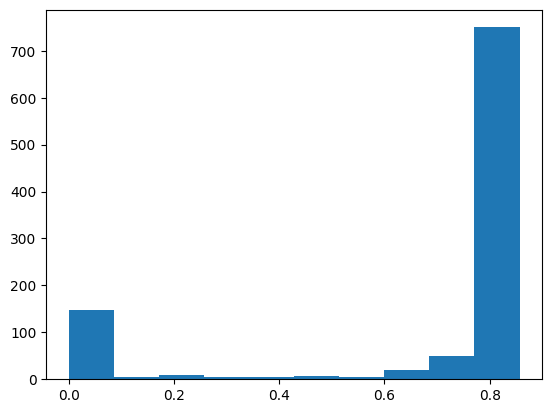

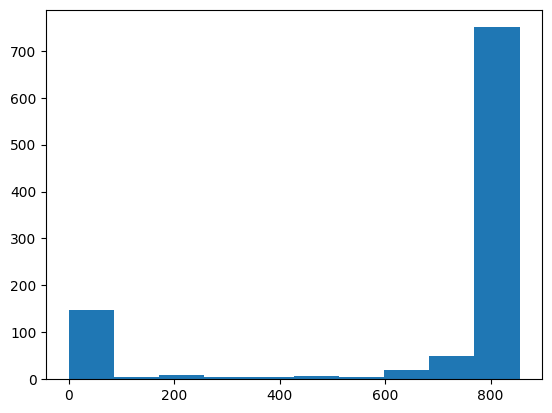

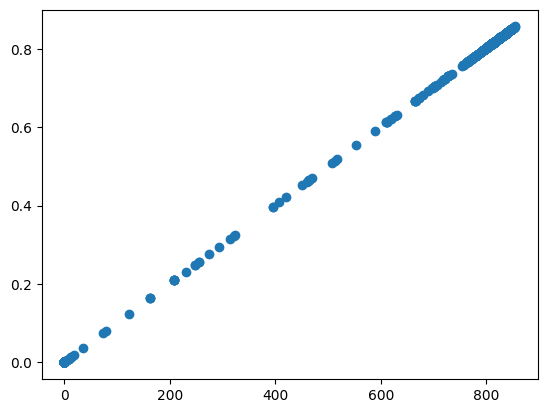

In [ ]:
import matplotlib.pyplot as plt
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_centrality.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_centrality.values()))
plt.show()

In [ ]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(G)
print([community for community in communities])

[{1000}, {999}, {998}, {997}, {996}, {995}, {994}, {993}, {992}, {991}, {990}, {989}, {988}, {987}, {986}, {985}, {984}, {983}, {982}, {981}, {980}, {979}, {978}, {977}, {976}, {975}, {974}, {973}, {972}, {971}, {970}, {969}, {968}, {967}, {966}, {965}, {964}, {963}, {962}, {961}, {960}, {959}, {958}, {957}, {956}, {955}, {954}, {953}, {952}, {951}, {950}, {949}, {948}, {947}, {946}, {945}, {944}, {943}, {942}, {941}, {940}, {939}, {938}, {937}, {936}, {935}, {934}, {933}, {932}, {931}, {930}, {929}, {928}, {927}, {926}, {925}, {924}, {923}, {922}, {921}, {920}, {919}, {918}, {917}, {916}, {915}, {914}, {913}, {912}, {911}, {910}, {909}, {908}, {907}, {906}, {905}, {904}, {903}, {902}, {901}, {900}, {899}, {898}, {897}, {896}, {895}, {894}, {893}, {892}, {891}, {890}, {889}, {888}, {887}, {886}, {885}, {884}, {883}, {882}, {881}, {880}, {879}, {878}, {877}, {876}, {875}, {874}, {873}, {872}, {871}, {870}, {869}, {868}, {867}, {866}, {865}, {864}, {863}, {862}, {861}, {860}, {859}, {858

In [ ]:
import networkx as nx
import community.community_louvain as community
from sklearn.metrics import silhouette_score

# Apply the Louvain algorithm for community detection
partition = community.best_partition(G)

# Convert the partition into communities
communities = []
for node, comm_id in partition.items():
    while comm_id >= len(communities):
        communities.append(set())
    communities[comm_id].add(node)

# Compute Conductance
conductance_scores = []
for comm in communities:
    cut_edges = nx.cut_size(G, comm)
    volume = nx.volume(G, comm)
    if volume == 0:  # Skip communities with zero volume
        continue
    conductance = cut_edges / volume
    conductance_scores.append(conductance)

# Print the Conductance scores
print(f"Conductance scores: {conductance_scores}")


Conductance scores: [0.5506797532992904, 0.9940652818991098, 0.9105909302408819, 0.9509807164356828, 0.7692307692307693, 0.9224603914259086, 0.9314541542607524, 0.8757820498236834, 0.9412392884119501, 0.9548872180451128, 0.6666666666666666, 0.8, 0.0, 0.9278059258913353, 0.625]


In [ ]:
num_communities = len(set(partition.values()))

# Print the result
print("Number of distinct communities: ", num_communities)

Number of distinct communities:  150


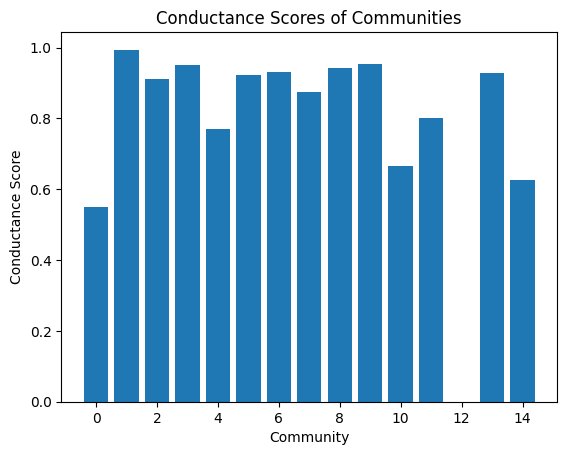

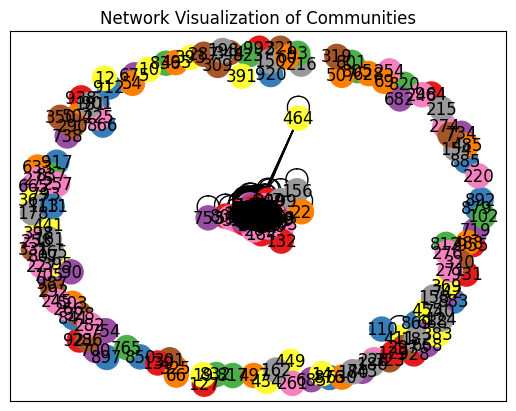

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt



# Visualize Conductance Scores
plt.bar(range(len(conductance_scores)), conductance_scores)
plt.xlabel("Community")
plt.ylabel("Conductance Score")
plt.title("Conductance Scores of Communities")
plt.show()

# Create Network Visualization of Communities
G = nx.from_pandas_adjacency(df3)  # Replace with your adjacency matrix

# Set node colors based on communities
node_colors = []
for node in G.nodes:
    for i, comm in enumerate(communities):
        if node in comm:
            node_colors.append(i)

# Draw the graph with node colors representing communities
pos = nx.spring_layout(G)  # Define node positions
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("Network Visualization of Communities")
plt.show()


In [ ]:
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)

# Visualize the conflict network with node colors representing communities
pos = nx.spring_layout(G)  # Positions of the nodes
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=cmap, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.title('Conflict Network with Community Structure')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming you have your data stored in a variable called 'data'
data=df3
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
spectral_labels = spectral.fit_predict(data)

# Evaluation metrics
dbscan_silhouette = silhouette_score(data, dbscan_labels)
spectral_silhouette = silhouette_score(data, spectral_labels)

print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("Spectral Clustering Silhouette Score:", spectral_silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


DBSCAN Silhouette Score: 0.03558630357554981
Spectral Clustering Silhouette Score: 0.3767476946295809


In [ ]:
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Print the result
print("Number of clusters: ", num_clusters)

Number of clusters:  16


In [ ]:
num_clusters1 = len(set(spectral_labels)) - (1 if -1 in spectral_labels else 0)

# Print the result
print("Number of clusters: ", num_clusters1)

Number of clusters:  3
